In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Este script evalua las funciones del tiempo de evaporación y sedimentación descritos en el paper
https://www.pnas.org/doi/full/10.1073/pnas.2011889117

In [2]:
eta = 1.86*10**(-8)     # gramos/micro metros * segundo  -- viscosidad del aire a 25°C
rho = 10**(-12)         # gramos/ micro metros cubicos   -- densidad del agua
g   = 9.8*10**(6)       # micro metro / segundo cuadrado -- gravedad

In [3]:
phi = (9*eta)/(2*rho*g) # micro metro * segundo  -- prefactor

In [4]:
print(phi)

0.008540816326530613


In [5]:
print(0.85*10**(-2))

0.0085


In [6]:
h = 1.5*10**(6) #altura promedio de la boca en micro metros

In [7]:
def t_sed(R):
    r = R#*10**(-6)             #convertimos los radios a micro metros
    tsed = (phi*h)/(r**(2))
    return tsed

In [8]:
t_sed(1)/60

213.52040816326533

In [9]:
radios = np.linspace(1,10000)

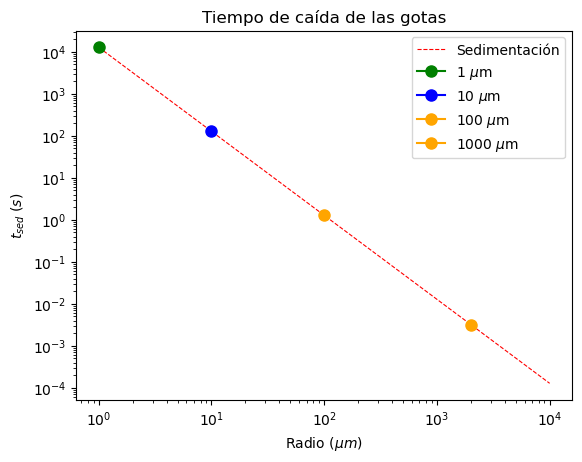

In [10]:
plt.plot(radios,t_sed(radios), color='red',ls='--', linewidth= 0.8, label = "Sedimentación")
d1= plt.plot(1,t_sed(1), marker='o', color='green', markersize='8', fillstyle='full', label="1 $\mu$m")
d10= plt.plot(10,t_sed(10), marker='o', color='blue', markersize='8', fillstyle='full', label="10 $\mu$m")
d100= plt.plot(100,t_sed(100), marker='o', color='orange', markersize='8', fillstyle='full', label="100 $\mu$m")
d100= plt.plot(2000,t_sed(2000), marker='o', color='orange', markersize='8', fillstyle='full', label="1000 $\mu$m")

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Radio $(\mu m)$')
plt.title('Tiempo de caída de las gotas')
plt.ylabel("$t_{sed}~(s)$")
plt.legend(loc='upper right')
plt.show()

In [11]:
RH    = 0.12             # Humedad relativa del aire común en una habitación
alpha = 0.36            # Factor numérico de corrección
D_w   = 2.5*10**(7)     # (micro metro)^2 / segundo -- constante de difusion de una molecula de agua en el aire
c_g   = 7.7*10**(5)     # (micro metro)^-3          -- numero de concentración del agua
v_w   = 3*10**(-11)     # (micro metro)^-3          -- volumen molecular del agua


In [12]:
theta = 2*alpha*D_w*c_g*v_w

In [13]:
print(theta)

415.8


In [14]:
4.2*10**2

420.0

In [15]:
def t_ev(R0):
    r0  = R0#*10**(-6)
    rdn = R0/3
    tev = (r0**2-rdn**2)/(theta*(1-RH))
    return tev#*10**10

In [16]:
t_ev(1)/60

4.048825597647146e-05

In [17]:
70*10**(-3)

0.07

In [18]:
RadiosIniciales = np.linspace(0.07,100)

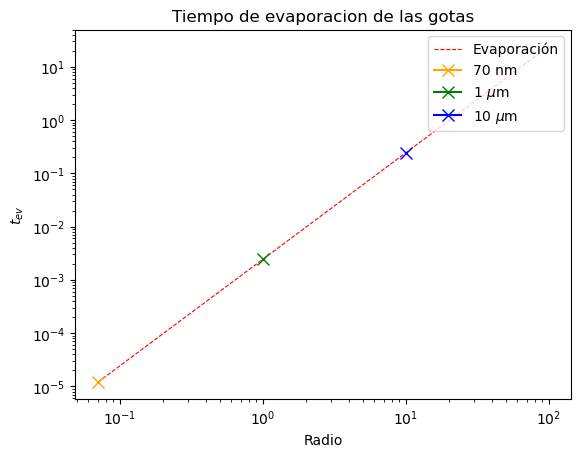

In [19]:
plt.plot(RadiosIniciales,t_ev(RadiosIniciales), color='red',ls='--', linewidth= 0.8, label = "Evaporación" )
ev70= plt.plot(0.07,t_ev(0.07), marker='x', color='orange', markersize='8', fillstyle='full', label="70 nm")
ev1= plt.plot(1,t_ev(1), marker='x', color='green', markersize='8', fillstyle='full', label="1 $\mu$m")
ev10= plt.plot(10,t_ev(10), marker='x', color='blue', markersize='8', fillstyle='full', label="10 $\mu$m")

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Radio')
plt.title('Tiempo de evaporacion de las gotas')
plt.ylabel("$t_{ev}$")
plt.legend(loc='upper right')
plt.show()

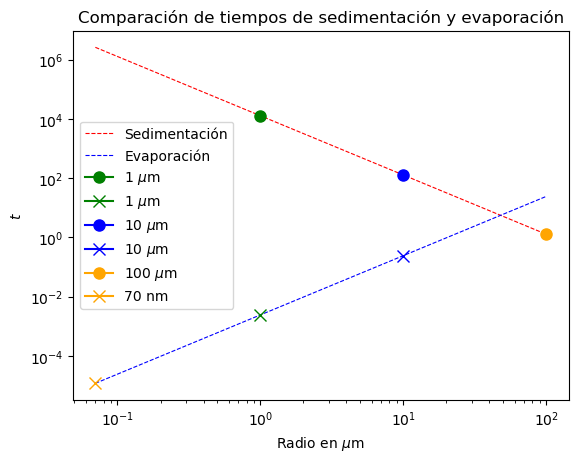

In [20]:
plt.plot(RadiosIniciales,t_sed(RadiosIniciales), color='red',ls='--', linewidth= 0.8, label = "Sedimentación")
plt.plot(RadiosIniciales,t_ev(RadiosIniciales), color='blue',ls='--', linewidth= 0.8, label = "Evaporación" )

d1= plt.plot(1,t_sed(1), marker='o', color='green', markersize='8', fillstyle='full', label="1 $\mu$m")
ev1= plt.plot(1,t_ev(1), marker='x', color='green', markersize='8', fillstyle='full', label="1 $\mu$m")

d10= plt.plot(10,t_sed(10), marker='o', color='blue', markersize='8', fillstyle='full', label="10 $\mu$m")
ev10= plt.plot(10,t_ev(10), marker='x', color='blue', markersize='8', fillstyle='full', label="10 $\mu$m")

d100= plt.plot(100,t_sed(100), marker='o', color='orange', markersize='8', fillstyle='full', label="100 $\mu$m")
ev70= plt.plot(0.07,t_ev(0.07), marker='x', color='orange', markersize='8', fillstyle='full', label="70 nm")

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Radio en $\mu$m')
plt.title('Comparación de tiempos de sedimentación y evaporación')
plt.ylabel("$t$")
plt.legend(loc='best')
plt.show()

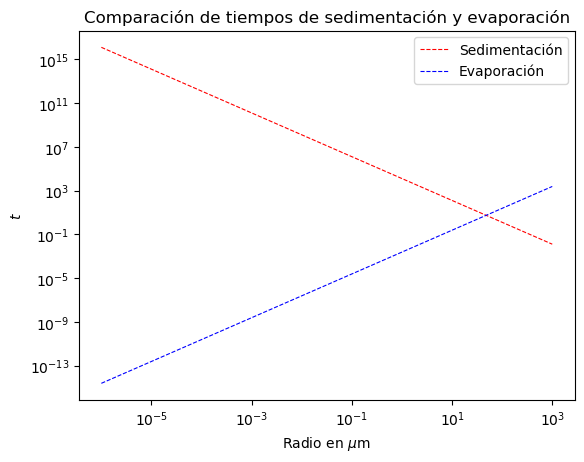

In [21]:
RegimenAmplio = np.linspace(10**(-6),10**3)

plt.plot(RegimenAmplio ,t_sed(RegimenAmplio), color='red',ls='--', linewidth= 0.8, label = "Sedimentación")
plt.plot(RegimenAmplio ,t_ev(RegimenAmplio), color='blue',ls='--', linewidth= 0.8, label = "Evaporación" )

#d1= plt.plot(1,t_sed(1), marker='o', color='green', markersize='8', fillstyle='full', label="1 $\mu$m")
#ev1= plt.plot(1,t_ev(1), marker='x', color='green', markersize='8', fillstyle='full', label="1 $\mu$m")

#d10= plt.plot(10,t_sed(10), marker='o', color='blue', markersize='8', fillstyle='full', label="10 $\mu$m")
#ev10= plt.plot(10,t_ev(10), marker='x', color='blue', markersize='8', fillstyle='full', label="10 $\mu$m")

#d100= plt.plot(100,t_sed(100), marker='o', color='orange', markersize='8', fillstyle='full', label="100 $\mu$m")
#ev70= plt.plot(0.07,t_ev(0.07), marker='x', color='orange', markersize='8', fillstyle='full', label="70 nm")

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Radio en $\mu$m')
plt.title('Comparación de tiempos de sedimentación y evaporación')
plt.ylabel("$t$")
plt.legend(loc='best')
plt.show()

In [22]:
delta = 4
for r in RegimenAmplio:
    if t_ev(r) - delta < t_sed(r) < t_ev(r)+delta :
        print(r, t_sed(r), t_ev(r))

40.81632748979592 7.689937138572951 4.047139479825358


In [23]:
def t_shrink(R0,R):
    r0 = R0
    rdn = R0/3
    factor = (r0*(R- rdn))/(R*(r0 -rdn))
    t = 1 - (R**2/r0**2) - (2*rdn**2 / 3*r0**2) #* np.log(factor)
    return t

In [24]:
t_shrink(0.1,0.01)

0.9899925925925925

In [25]:
def R_sed(t):
    r = np.sqrt(phi*h/t)
    return r

In [26]:
def R_ev(t):
    r = np.sqrt(9*t*theta*(1-RH)/8)  
    return r

In [44]:
2*R_sed(0.1), 2*R_ev(0.1)

(715.8554180781457, 12.831866582847564)

In [41]:
t_ev(6.086688754980002)

0.09000000000000001

In [28]:
Intervalo_interes = np.linspace(0.0000000001,0.15,1000)

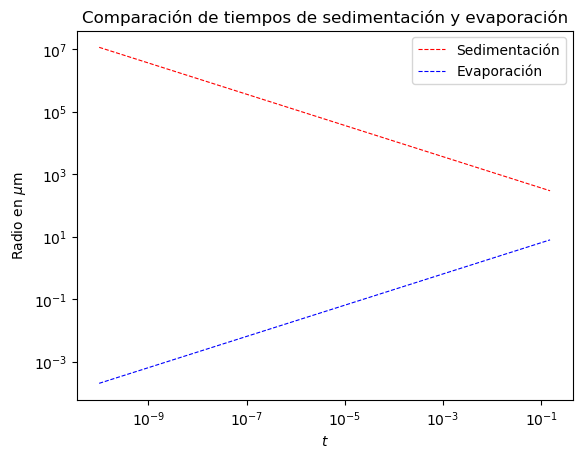

In [29]:
plt.plot(Intervalo_interes ,R_sed(Intervalo_interes), color='red',ls='--', linewidth= 0.8, label = "Sedimentación")
plt.plot(Intervalo_interes ,R_ev(Intervalo_interes), color='blue',ls='--', linewidth= 0.8, label = "Evaporación")
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Radio en $\mu$m')
plt.title('Comparación de tiempos de sedimentación y evaporación')
plt.xlabel("$t$")
plt.legend(loc='best')
plt.show()